# Visualization of FGW nonconvexity

In [22]:
import numpy as np
import os,sys

path = os.path.realpath('lib_0.0')

# sys.path.append(os.path.realpath('../lib_0.0'))
sys.path.append(os.path.realpath(path))

from graph import graph_colors,draw_rel,draw_transp,Graph,wl_labeling
from ot_distances import Fused_Gromov_Wasserstein_distance,Wasserstein_distance
import copy
# from data_loader import load_local_data,histog,build_noisy_circular_graph
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
from matplotlib import cm
import networkx as nx
import ot

Create two simple graphs

In [23]:
G1=Graph()
G1.add_attributes({1:3,2:6,3:9})    # add color to nodes
G1.add_edge((1,2))
G1.add_edge((2,3))
G1.add_edge((3,1))

G2=Graph()
G2.add_attributes({1:3,2:6})
G2.add_edge((1,2))

g1=G1.nx_graph
g2=G2.nx_graph

Show the graphs

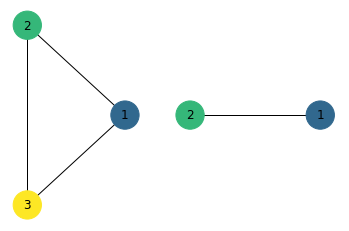

In [24]:
vmin=0
vmax=9  # the range of color
# plt.figure(figsize=(8,5))
plt.figure()
draw_rel(g1,vmin=vmin,vmax=vmax,with_labels=True,draw=False)
draw_rel(g2,vmin=vmin,vmax=vmax,with_labels=True,shiftx=3,draw=False)
# plt.title('Two graphs. Color indicates the label')
plt.axis('off')
plt.show()

Compare W coupling, GW coupling, and FGW coupling  

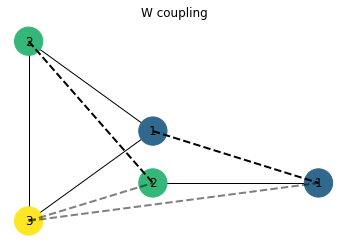

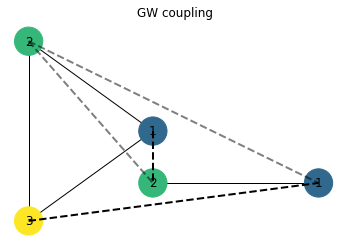

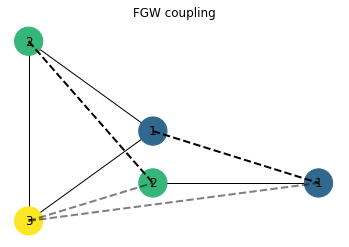

In [25]:
p1=ot.unif(3)
p2 = ot.unif(2)

fea_metric = 'dirac'
# fea_metric = 'hamming'
# fea_metric = 'sqeuclidean'

thresh=0.004

# WD           
fig = plt.figure()
dw,transp_WD=Wasserstein_distance(features_metric=fea_metric).graph_d(G1,G2,p1,p2)
plt.title('W coupling')
draw_transp(G1,G2,transp_WD,shiftx=2,shifty=0.5,thresh=thresh,swipy=True,swipx=False,with_labels=True,vmin=vmin,vmax=vmax)
plt.axis('off')
plt.show()

# GWD
fig = plt.figure()
dgw,log_GWD,transp_GWD,M,C1,C2=Fused_Gromov_Wasserstein_distance(alpha=1,features_metric=fea_metric,method='shortest_path').graph_d(G1,G2,p1,p2)
plt.title('GW coupling')
draw_transp(G1,G2,transp_GWD,shiftx=2,shifty=0.5,thresh=thresh,swipy=True,swipx=False,with_labels=True,vmin=vmin,vmax=vmax)
plt.axis('off')
plt.show()

# FGWD
alpha=0.5
fig = plt.figure()
dfgw,log_FGWD,transp_FGWD,M,C1,C2=Fused_Gromov_Wasserstein_distance(alpha=alpha,features_metric=fea_metric,method='shortest_path').graph_d(G1,G2,p1,p2)
plt.title('FGW coupling')
draw_transp(G1,G2,transp_FGWD,shiftx=2,shifty=0.5,thresh=thresh,swipy=True,swipx=False,with_labels=True,vmin=vmin,vmax=vmax)
plt.axis('off')
plt.show()

Consider the 3 by 2 transport matrix $\boldsymbol{T}$, with only two variables $a$ and $b$,
$$
\boldsymbol{T} =
	\begin{bmatrix}
		a & 1/3-a\\
		b & 1/3-b\\
		1/2-a-b & -1/6+a+b
	\end{bmatrix}.
$$
The variables $a$ and $b$ act as the two axis in the following figures.

In [26]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d

from FGW import cal_L,tensor_matrix,gwloss

In [27]:
# create the grid
A = np.linspace(0,1/3,100)  
B = np.linspace(0,1/3,100)

y = np.zeros([len(A),len(B)])
yy = np.zeros([len(A),len(B)])
y2 = np.zeros([len(A),len(B)])
y_proj = np.zeros([len(A),len(B)])
# y_entropic = np.zeros([len(A),len(B)])

C1=np.array([[0,1,1],[1,0,1],[1,1,0]])
C2=np.array([[0,1],[1,0]])                               

L=cal_L(C1,C2)
                                                        
AA, BB = np.meshgrid(A, B)
# reg=0
for i in range(len(A)):
    for j in range(len(B)):
        a=AA[i,j]
        b=BB[i,j]
        T=np.array([[a,1/3-a],[b,1/3-b],[1/2-a-b,-1/6+a+b]])
        y[i][j]=gwloss(L,T) # GWD
        yy[i][j] = 2/3+1/2-2*( (1/2-a)*(1/3-a)+(1/6+a)*a+(1/2-b)*(1/3-b)+(1/6+b)*b+(a+b)*(-1/6+a+b)+(2/3-a-b)*(1/2-a-b) ) # formula by hand
        y2[i][j]=(1-alpha)*np.sum(M * T) + alpha * y[i][j] # FGWD
        y_proj[i][j]=0 # projectiion points
        
        # y[i][j]=y[i][j] + reg * np.sum(np.log(T)*T) # add the entropy actually automatically set the constraint 
        # y2[i][j]=y2[i][j] + reg * np.sum(np.log(T)*T)
        # yy[i][j]=yy[i][j] + reg * np.sum(np.log(T)*T)

In [28]:
print(y)

[[-0.16666667 -0.15328935 -0.14009341 ...  0.28639368  0.28217642
   0.27777778]
 [-0.15328935 -0.14000272 -0.12689748 ...  0.29097371  0.28666576
   0.28217642]
 [-0.14009341 -0.12689748 -0.11388294 ...  0.29537235  0.29097371
   0.28639368]
 ...
 [ 0.28639368  0.29097371  0.29537235 ... -0.11388294 -0.12689748
  -0.14009341]
 [ 0.28217642  0.28666576  0.29097371 ... -0.12689748 -0.14000272
  -0.15328935]
 [ 0.27777778  0.28217642  0.28639368 ... -0.14009341 -0.15328935
  -0.16666667]]


Check if $y$ and $yy$ are consistent

In [29]:
print(yy)

[[-0.16666667 -0.15328935 -0.14009341 ...  0.28639368  0.28217642
   0.27777778]
 [-0.15328935 -0.14000272 -0.12689748 ...  0.29097371  0.28666576
   0.28217642]
 [-0.14009341 -0.12689748 -0.11388294 ...  0.29537235  0.29097371
   0.28639368]
 ...
 [ 0.28639368  0.29097371  0.29537235 ... -0.11388294 -0.12689748
  -0.14009341]
 [ 0.28217642  0.28666576  0.29097371 ... -0.12689748 -0.14000272
  -0.15328935]
 [ 0.27777778  0.28217642  0.28639368 ... -0.14009341 -0.15328935
  -0.16666667]]


In [30]:
absolute_diff = np.abs(y - yy)
# Check if all elements have absolute difference below 1e-9
np.all(absolute_diff < 1e-9)

True

In [31]:
# set all values outside condition to nan
y[AA+BB > 1/2] = np.nan
y[AA+BB < 1/6] = np.nan
y2[AA+BB > 1/2] = np.nan
y2[AA+BB < 1/6] = np.nan
y_proj[AA+BB > 1/2] = np.nan
y_proj[AA+BB < 1/6] = np.nan

Plot the surface of GWD

In [32]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

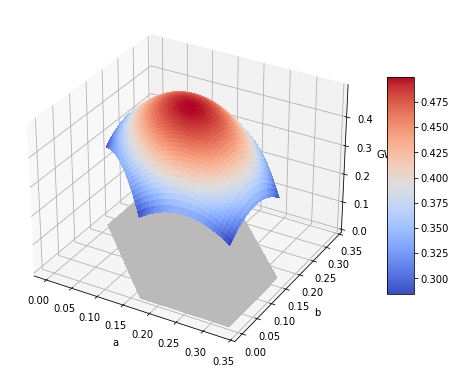

In [33]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(AA,BB,y, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=8)
surf = ax.plot_surface(AA,BB,y_proj, color = '0.95',
                        linewidth=0, antialiased=False)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('GW')
plt.show()

Plot contour of GWD

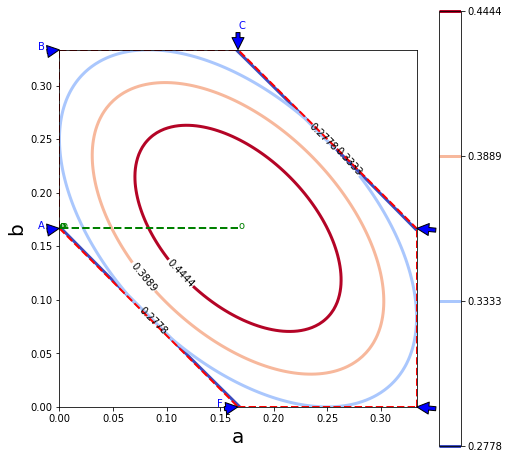

In [34]:
fig = plt.figure(figsize=(8,8))

y[np.isnan(y)] = 0 # set nan to zero
yy[np.isnan(yy)] = 0 # set nan to zero; y and yy are not exactly the same due to numerical calculation 

# levels = np.arange (-3/18, np.max(y), 1/18)
levels = np.arange (5/18, np.max(y), 1/18)

h = plt.contour(A, B, y, levels=levels, cmap=cm.coolwarm, linewidths=3)
plt.clabel(h, inline=1, fontsize=10, colors='k')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('a',fontsize=20)
plt.ylabel('b',fontsize=20)
# ax.set_xlabel('a',fontsize=20)
# ax.set_ylabel('b',fontsize=20)

# plot feasible set
B1 = 1/6-A
B2 = 1/2-A
plt.plot(A,B1,A,B2, color = 'r', linewidth=2, linestyle="--")

def plot_seg(point1,point2, color = 'r'):
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, color = color , linewidth=2, linestyle="--")
    
plot_seg([0,1/6],[0,1/3])
plot_seg([0,1/3],[1/6,1/3])
plot_seg([1/6,0],[1/3,0])
plot_seg([1/3,0],[1/3,1/6])

# six notated points
plt.annotate('A', xy=(0,1/6), xytext=(-0.02, 1/6), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('B', xy=(0,1/3), xytext=(-0.02, 1/3), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('C', xy=(1/6,1/3), xytext=(1/6, 1/3+0.02), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('D', xy=(1/3,1/6), xytext=(1/3+0.02, 1/6), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('E', xy=(1/3,0), xytext=(1/3+0.02, 0), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('F', xy=(1/6,0), xytext=(1/6-0.02, 0), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))

# plot the optimization progress of GWD
T_log=log_GWD['G']

k=0
t=T_log[k]
pos_old=[t[0][0],t[1][0]]
plt.annotate('o', xy=pos_old, color = 'g')
while k<=len(T_log)-2:
    t=T_log[k+1]
    pos_new=[t[0][0],t[1][0]]
    plt.annotate('o', xy=pos_new, color = 'g')
    plot_seg(pos_old,pos_new, color = 'g')
    k+=1
    pos_old=pos_new
        
plt.show()

Do the same for FGW distance

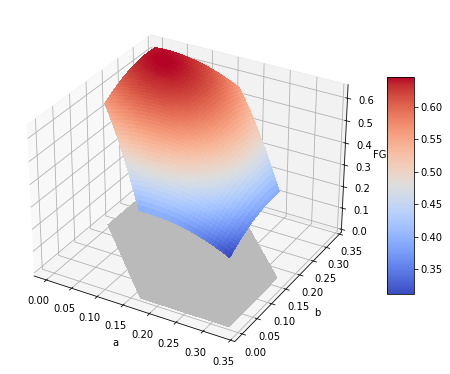

In [35]:
# plot surface of FGWD
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
AA, BB = np.meshgrid(A, B)
surf = ax.plot_surface(AA,BB,y2, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=8)

surf = ax.plot_surface(AA,BB,y_proj, color = '0.95',
                        linewidth=0, antialiased=False)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('FGW')
plt.show()

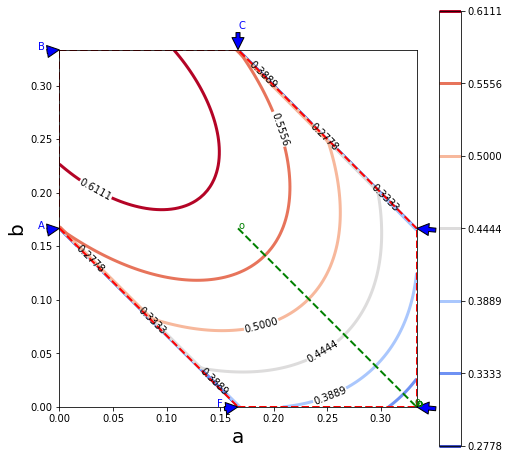

In [36]:
# plot contour of FGWD
fig = plt.figure(figsize=(8,8))
y2[np.isnan(y2)] = 0 # set nan to zero

# levels = np.arange (-3/18, np.max(y2), 1/18)
levels = np.arange (5/18, np.max(y2), 1/18)

h = plt.contour(A, B, y2, levels=levels, cmap=cm.coolwarm, linewidths=3)
plt.clabel(h, inline=1, fontsize=10, colors='k')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('a',fontsize=20)
plt.ylabel('b',fontsize=20)
# ax.set_xlabel('a',fontsize=20)
# ax.set_ylabel('b',fontsize=20)

# plot feasible set
B1 = 1/6-A
B2 = 1/2-A
plt.plot(A,B1,A,B2, color = 'r', linewidth=2, linestyle="--")

def plot_seg(point1,point2, color = 'r'):
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, color = color , linewidth=2, linestyle="--")
    
plot_seg([0,1/6],[0,1/3])
plot_seg([0,1/3],[1/6,1/3])
plot_seg([1/6,0],[1/3,0])
plot_seg([1/3,0],[1/3,1/6])

# six notated points
plt.annotate('A', xy=(0,1/6), xytext=(-0.02, 1/6), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('B', xy=(0,1/3), xytext=(-0.02, 1/3), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('C', xy=(1/6,1/3), xytext=(1/6, 1/3+0.02), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('D', xy=(1/3,1/6), xytext=(1/3+0.02, 1/6), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('E', xy=(1/3,0), xytext=(1/3+0.02, 0), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))
plt.annotate('F', xy=(1/6,0), xytext=(1/6-0.02, 0), color = 'b', arrowprops=dict(facecolor='b', shrink=0.01))


# plot the optimization progress of FGWD
T_log=log_FGWD['G']

k=0
t=T_log[k]
pos_old=[t[0][0],t[1][0]]
plt.annotate('o', xy=pos_old, color = 'g')
while k<=len(T_log)-2:
    t=T_log[k+1]
    pos_new=[t[0][0],t[1][0]]
    plt.annotate('o', xy=pos_new, color = 'g')
    plot_seg(pos_old,pos_new, color = 'g')
    k+=1
    pos_old=pos_new
        
plt.show()